In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asdfgh/Training_Images/Image-4195.jpg
/kaggle/input/asdfgh/Training_Images/Image-5535.jpg
/kaggle/input/asdfgh/Training_Images/Image-53.jpg
/kaggle/input/asdfgh/Training_Images/Image-5619.jpg
/kaggle/input/asdfgh/Training_Images/Image-1907.jpg
/kaggle/input/asdfgh/Training_Images/Image-1170.jpg
/kaggle/input/asdfgh/Training_Images/Image-94.jpg
/kaggle/input/asdfgh/Training_Images/Image-5014.jpg
/kaggle/input/asdfgh/Training_Images/Image-1631.jpg
/kaggle/input/asdfgh/Training_Images/Image-1692.jpg
/kaggle/input/asdfgh/Training_Images/Image-2602.jpg
/kaggle/input/asdfgh/Training_Images/Image-694.jpg
/kaggle/input/asdfgh/Training_Images/Image-5230.jpg
/kaggle/input/asdfgh/Training_Images/Image-5647.jpg
/kaggle/input/asdfgh/Training_Images/Image-6242.jpg
/kaggle/input/asdfgh/Training_Images/Image-3123.jpg
/kaggle/input/asdfgh/Training_Images/Image-6302.jpg
/kaggle/input/asdfgh/Training_Images/Image-3301.jpg
/kaggle/input/asdfgh/Training_Images/Image-3730.jpg
/kaggle/input/asd

/kaggle/input/asdfgh/Training_Images/Image-6491.jpg
/kaggle/input/asdfgh/Training_Images/Image-4618.jpg
/kaggle/input/asdfgh/Training_Images/Image-3910.jpg
/kaggle/input/asdfgh/Training_Images/Image-5039.jpg
/kaggle/input/asdfgh/Training_Images/Image-5830.jpg
/kaggle/input/asdfgh/Training_Images/Image-6513.jpg
/kaggle/input/asdfgh/Training_Images/Image-4752.jpg
/kaggle/input/asdfgh/Training_Images/Image-5237.jpg
/kaggle/input/asdfgh/Training_Images/Image-4805.jpg
/kaggle/input/asdfgh/Training_Images/Image-1924.jpg
/kaggle/input/asdfgh/Training_Images/Image-5686.jpg
/kaggle/input/asdfgh/Training_Images/Image-5930.jpg
/kaggle/input/asdfgh/Training_Images/Image-2096.jpg
/kaggle/input/asdfgh/Training_Images/Image-1143.jpg
/kaggle/input/asdfgh/Training_Images/Image-2717.jpg
/kaggle/input/asdfgh/Training_Images/Image-1456.jpg
/kaggle/input/asdfgh/Training_Images/Image-366.jpg
/kaggle/input/asdfgh/Training_Images/Image-2121.jpg
/kaggle/input/asdfgh/Training_Images/Image-3647.jpg
/kaggle/input

/kaggle/input/asdfgh/Training_Images/Image-4103.jpg
/kaggle/input/asdfgh/Training_Images/Image-5401.jpg
/kaggle/input/asdfgh/Training_Images/Image-815.jpg
/kaggle/input/asdfgh/Training_Images/Image-3385.jpg
/kaggle/input/asdfgh/Training_Images/Image-4167.jpg
/kaggle/input/asdfgh/Training_Images/Image-1008.jpg
/kaggle/input/asdfgh/Training_Images/Image-222.jpg
/kaggle/input/asdfgh/Training_Images/Image-1072.jpg
/kaggle/input/asdfgh/Training_Images/Image-3577.jpg
/kaggle/input/asdfgh/Training_Images/Image-5088.jpg
/kaggle/input/asdfgh/Training_Images/Image-3924.jpg
/kaggle/input/asdfgh/Training_Images/Image-3472.jpg
/kaggle/input/asdfgh/Training_Images/Image-3990.jpg
/kaggle/input/asdfgh/Training_Images/Image-3333.jpg
/kaggle/input/asdfgh/Training_Images/Image-953.jpg
/kaggle/input/asdfgh/Training_Images/Image-4241.jpg
/kaggle/input/asdfgh/Training_Images/Image-3055.jpg
/kaggle/input/asdfgh/Training_Images/Image-5115.jpg
/kaggle/input/asdfgh/Training_Images/Image-466.jpg
/kaggle/input/as

In [2]:
import numpy as np
import pandas as pd

import hashlib
from hashlib import md5
import os
import random
import shutil as sh

import matplotlib.pyplot as plt

import fastai
from fastai.vision import *

In [3]:
df1 = pd.read_csv("/kaggle/input/challengedata/Trainingcopy.csv")

df1.head()

,file,label
0,1,0
1,2,2
2,3,3
3,4,4
4,5,0


In [4]:
df1['path1'] = 'Image-'

df1['jpg'] = '.jpg'

df1['Image'] =  df1['path1'] + df1['file'].astype(str) + df1['jpg']
df1 = df1.drop(['file','path1','jpg'], axis = 1)

df1 = df1[['Image','label']]

label_count = df1.groupby('label')['Image'].nunique()

print("Class label and Image count\n",label_count)

Class label and Image count
 label
0     892
1     976
2    1044
3    1101
4    1206
Name: Image, dtype: int64


In [5]:
###### Change of working directory
os.chdir("/kaggle/input/asdfgh/Training_Images")
os.getcwd()
file_list = os.listdir()
print("no of files: ", len(file_list))

no of files:  5219


In [6]:
####### Identify duplicate images ##########

#original_fname = []

#duplicates = []

duplicate_fname = []

hash_keys =dict()

from tqdm import tqdm


for index, filename in tqdm(enumerate(os.listdir(".")), desc = 'Files' , total = len(file_list), position= 0):
#    original_fname.append((index,filename))
    if os.path.isfile(filename):
        with open(filename,'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys:
            hash_keys[filehash] = index 
        else:
            duplicate_fname.append(filename)
            #duplicates.append((index,hash_keys[filehash]))  #uncomment to know the duplicate image index and original image index
#############################################

Files: 100%|██████████| 5219/5219 [00:14<00:00, 372.77it/s]


In [7]:
print("Number of duplicate images:",len(duplicate_fname))

Number of duplicate images: 551


In [8]:
from distutils.dir_util import copy_tree
fromDirectory = "/kaggle/input/asdfgh/Training_Images"
toDirectory = "/kaggle/working/Images/Training_Images"
copy_tree(fromDirectory,toDirectory)
print("Files copied: ",len(os.listdir("/kaggle/working/Images/Training_Images")))

Files copied:  5219


In [9]:

####### Remove Duplcaites image files from the folder#######

source_path = "/kaggle/working/Images/Training_Images/"

j=0

while j < len(duplicate_fname):
    os.remove(source_path + duplicate_fname[j])
    j = j +1 

print("Non-Duplciate files remaining for training: ",len(os.listdir(source_path)))
############################################################

Non-Duplciate files remaining for training:  4668


In [10]:

###### Change of working directory #######
os.chdir("/kaggle/working/Images/Training_Images")


In [11]:
########### Remove duplicate entries from label dataframe ########

new_df = df1[~df1.Image.isin(duplicate_fname)]

print("Non-Duplciate entries in the label set file: ",len(new_df))
############################################################

Non-Duplciate entries in the label set file:  4668


In [12]:

########### New DIRs for the class label vise data #########

os.mkdir('/kaggle/working/Images/Training_Set')
os.mkdir('/kaggle/working/Images/Training_Set/class0')
os.mkdir('/kaggle/working/Images/Training_Set/class1')
os.mkdir('/kaggle/working/Images/Training_Set/class2')
os.mkdir('/kaggle/working/Images/Training_Set/class3')
os.mkdir('/kaggle/working/Images/Training_Set/class4')

In [13]:
######### Extract image file names for each label ########

image_class0_df = new_df[new_df.label ==0]
image_class1_df = new_df[new_df.label ==1]
image_class2_df = new_df[new_df.label ==2]
image_class3_df = new_df[new_df.label ==3]
image_class4_df = new_df[new_df.label ==4]


image_class0_list = image_class0_df['Image'].to_list()
image_class1_list = image_class1_df['Image'].to_list()
image_class2_list = image_class2_df['Image'].to_list()
image_class3_list = image_class3_df['Image'].to_list()
image_class4_list = image_class4_df['Image'].to_list()

############################################################

In [14]:

########### Splitting the data for training and validation sets ###########
def split_image_files(source_dir, image_list, training_dir):
    
    training_set_length = int(len(image_list))
    random.sample(image_list,len(image_list))
    training_set = image_list[0:training_set_length]
    

    for file_name in training_set:
        temp_training_set = source_dir + file_name
        final_training_set = training_dir + file_name
        sh.copyfile(temp_training_set,final_training_set)


source_dir = '/kaggle/working/Images/Training_Images/'

class0_training_dir = '/kaggle/working/Images/Training_Set/class0/'
class1_training_dir = '/kaggle/working/Images/Training_Set/class1/'
class2_training_dir = '/kaggle/working/Images/Training_Set/class2/'
class3_training_dir = '/kaggle/working/Images/Training_Set/class3/'
class4_training_dir = '/kaggle/working/Images/Training_Set/class4/'


split_image_files(source_dir,image_class0_list,class0_training_dir)
split_image_files(source_dir,image_class1_list,class1_training_dir)
split_image_files(source_dir,image_class2_list,class2_training_dir)
split_image_files(source_dir,image_class3_list,class3_training_dir)
split_image_files(source_dir,image_class4_list,class4_training_dir)

###############################################################################

In [15]:
###### Checking if the images are distributed ########
for i in range(0,5):
    print("Number of training images for class",i," :",len(os.listdir('/kaggle/working/Images/Training_Set/class'+str(i)+'/')))
#     print("Number of validation images for class",i," :",len(os.listdir('/kaggle/working/Images/Validation_Set/class'+str(i)+'/')))

Number of training images for class 0  : 793
Number of training images for class 1  : 856
Number of training images for class 2  : 930
Number of training images for class 3  : 987
Number of training images for class 4  : 1102


In [16]:
path_img = ('/kaggle/working/Images/Training_Images/')

In [17]:
##### Generating the data for model ######
data2 = ImageDataBunch.from_folder("/kaggle/working/Images/Training_Set/", train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size= 150, num_workers= 6).normalize()

In [18]:
print("Class labels:",data2.classes)

Class labels: ['class0', 'class1', 'class2', 'class3', 'class4']


Sample images in a batch:


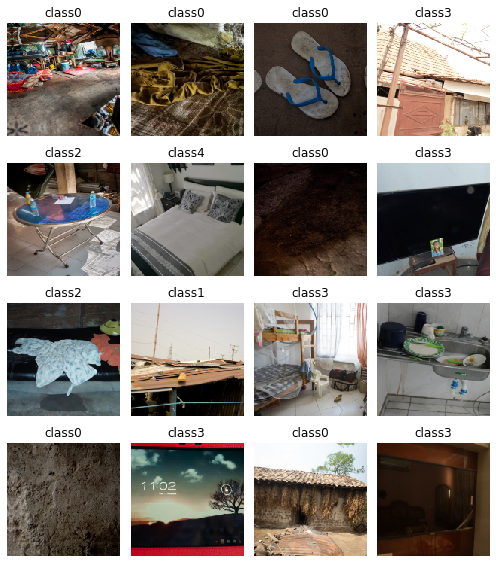

In [19]:
print("Sample images in a batch:")
data2.show_batch(rows=4, figsize=(7, 8))

In [20]:
model_resnet18 = cnn_learner(data2, models.resnet18, metrics = [error_rate,accuracy], pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [21]:
model_resnet18.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.342410,1.553215,0.612004,0.387996,01:30
1,1.928451,1.444382,0.574491,0.425509,01:30
2,1.717930,1.448265,0.579850,0.420150,01:29
3,1.493332,1.364073,0.564845,0.435155,01:31
4,1.332891,1.292859,0.580922,0.419078,01:29
5,1.240752,1.215722,0.534834,0.465166,01:30
6,1.177844,1.258933,0.534834,0.465166,01:28
7,1.145320,1.289950,0.558414,0.441586,01:30
8,1.105012,1.239440,0.543408,0.456592,01:28
9,1.048424,1.233974,0.533762,0.466238,01:31


Text(0.5, 1, 'Confusion Matrix: Model_resnet18')

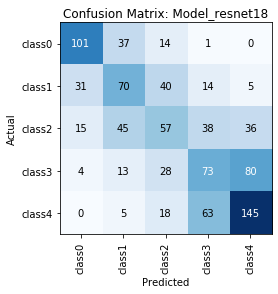

In [22]:
cm1 = ClassificationInterpretation.from_learner(model_resnet18)
cm1.plot_confusion_matrix()
plt.title("Confusion Matrix: Model_resnet18")

In [23]:
model_resnet18.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Text(0.5, 1.0, 'Loss Vs Learning Rate')

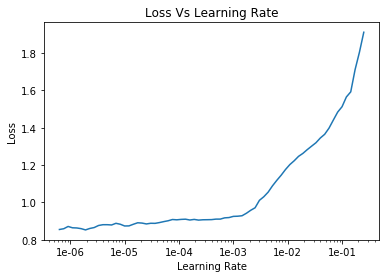

In [24]:
model_resnet18.lr_find()
model_resnet18.recorder.plot()
plt.title("Loss Vs Learning Rate: Model_resnet18")

In [25]:
####### Retraining the model with fixed learning rate interval #######
model_resnet18.fit_one_cycle(15, max_lr=slice(1e-7,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.873107,1.226184,0.533762,0.466238,01:29
1,0.879350,1.228836,0.530547,0.469453,01:30
2,0.887486,1.221933,0.533762,0.466238,01:30
3,0.866422,1.220086,0.535906,0.464094,01:30
4,0.875258,1.222507,0.532690,0.467310,01:28
5,0.869838,1.225852,0.528403,0.471597,01:30
6,0.854861,1.224230,0.520900,0.479100,01:28
7,0.848645,1.217516,0.532690,0.467310,01:30
8,0.855997,1.217461,0.534834,0.465166,01:29
9,0.862577,1.223563,0.528403,0.471597,01:30


In [26]:
########## Now with resnet34 model ######
model_resnet34 = cnn_learner(data2, models.resnet34, metrics = [error_rate,accuracy], pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [27]:
model_resnet34.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.322069,1.565582,0.620579,0.379421,01:28
1,1.978983,1.483937,0.566988,0.433012,01:28
2,1.723654,1.453218,0.562701,0.437299,01:29
3,1.483429,1.339158,0.544480,0.455520,01:28
4,1.318783,1.245811,0.533762,0.466238,01:29
5,1.240350,1.219447,0.527331,0.472669,01:27
6,1.173354,1.233286,0.544480,0.455520,01:28
7,1.112063,1.204710,0.526259,0.473741,01:28
8,1.095185,1.186338,0.506967,0.493033,01:28
9,1.012532,1.203381,0.517685,0.482315,01:28


Text(0.5, 1, 'Confusion Matrix: Model_resnet34')

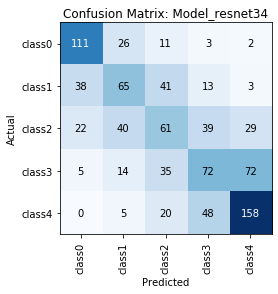

In [28]:
cm2 = ClassificationInterpretation.from_learner(model_resnet34)
cm2.plot_confusion_matrix()
plt.title("Confusion Matrix: Model_resnet34")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Text(0.5, 1.0, 'Loss Vs Learning Rate: Model_resnet18')

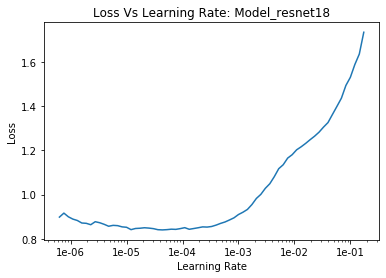

In [31]:
model_resnet34.unfreeze()
model_resnet34.lr_find()
model_resnet34.recorder.plot()
plt.title("Loss Vs Learning Rate: Model_resnet34")

In [30]:
######### Retraining the learner Model_resnet34 with fixed learning rate interval #######
model_resnet34.fit_one_cycle(15, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.839194,1.182746,0.496249,0.503751,01:28
1,0.848836,1.182949,0.502680,0.497320,01:30


KeyboardInterrupt: 

In [32]:
model_resnet50 = cnn_learner(data2, models.resnet50, metrics = [error_rate,accuracy], pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [33]:
model_resnet50.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.186812,1.568500,0.565916,0.434084,01:30
1,1.959668,1.645780,0.570204,0.429796,01:28
2,1.643424,1.428909,0.545552,0.454448,01:31
3,1.398192,1.381180,0.561629,0.438371,01:27
4,1.249538,1.215465,0.518757,0.481243,01:27
5,1.145651,1.171486,0.502680,0.497320,01:27
6,1.064595,1.198724,0.501608,0.498392,01:28
7,0.995004,1.153150,0.473741,0.526259,01:30
8,0.927444,1.206730,0.508039,0.491961,01:31
9,0.877828,1.162025,0.503751,0.496249,01:27


Text(0.5, 1, 'Confusion Matrix: Model_resnet50')

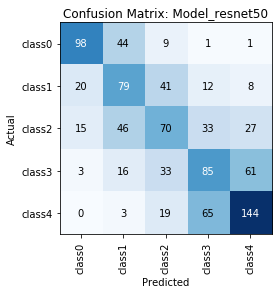

In [34]:
cm3 = ClassificationInterpretation.from_learner(model_resnet50)
cm3.plot_confusion_matrix()
plt.title("Confusion Matrix: Model_resnet50")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Text(0.5, 1.0, 'Loss Vs Learning Rate: Model_resnet50')

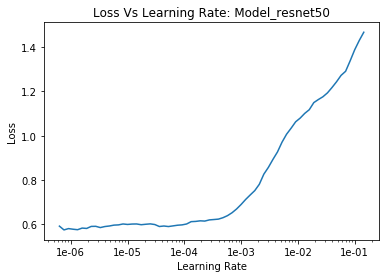

In [35]:
model_resnet50.unfreeze()
model_resnet50.lr_find()
model_resnet50.recorder.plot()
plt.title("Loss Vs Learning Rate: Model_resnet50")

In [36]:
######### Retraining the learner Model_resnet50 with fixed learning rate interval #######
model_resnet50.fit_one_cycle(15, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.634003,1.186355,0.489818,0.510182,01:29
1,0.616670,1.184149,0.484459,0.515541,01:28
2,0.616114,1.185402,0.491961,0.508039,01:29
3,0.589812,1.187061,0.495177,0.504823,01:28
4,0.571392,1.191244,0.487674,0.512326,01:28
5,0.526941,1.199155,0.474812,0.525188,01:27
6,0.486737,1.209824,0.493033,0.506967,01:29
7,0.460468,1.216137,0.476956,0.523044,01:27
8,0.440913,1.219447,0.478028,0.521972,01:28
9,0.407826,1.228845,0.480172,0.519828,01:27
